In [1]:
import sys

repo_root = "/home/druban/gpu_tests/ot-algorithm-comparison"
sys.path.insert(0, str(repo_root))

In [2]:
from uot.solvers.pdlp import _solve_pdlp
from uot.algorithms.rapdhg import create_ot_problem, raPDHG

In [3]:
import jax
jax.config.update("jax_enable_x64", True)

In [4]:
from uot.problems.store import ProblemStore

In [5]:
store = ProblemStore("/home/druban/gpu_tests/ot-algorithm-comparison/datasets/synthetic")

In [6]:
problem = store.load("/home/druban/gpu_tests/ot-algorithm-comparison/datasets/synthetic/2D-gaussians-1c-128p/0aba4e911207aa09d12c602052d73f1ba0129fe0.pkl")

2025-07-04 16:32:16.253807: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751661136.270700 1517587 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751661136.275905 1517587 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751661136.289184 1517587 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751661136.289199 1517587 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751661136.289201 1517587 computation_placer.cc:177] computation placer alr

In [7]:
costs = problem.get_costs()
marginals = problem.get_marginals()

In [8]:
problem = create_ot_problem(
    C=costs[0],
    mu=marginals[0].to_discrete()[1],
    nu=marginals[1].to_discrete()[1],
)

In [76]:
solver = raPDHG(
    verbose=True,
    jit=True,
    reg=1.0,
    eps_abs=1e-5,
    eps_rel=1e-5,
    iteration_limit=50000,
    termination_evaluation_frequency=64,
)

optimizer = jax.jit(solver.optimize, static_argnums=(1,))
optimizer_lower = optimizer.lower(problem, dim=problem.n)
compiled_optimizer = optimizer_lower.compile()

In [77]:
result, _ = compiled_optimizer(problem)
P_pdlp = result.current_primal_solution

2025-07-04 16:16:35,767 uot.algorithms.rapdhg.solver_log INFO: runtime | residuals                 | solution information      | relative residuals      |


runtime | residuals                 | solution information      | relative residuals      |


2025-07-04 16:16:35,768 uot.algorithms.rapdhg.solver_log INFO: #iter   | pr_norm  du_norm  gap     | pr_obj   du_obj   pr_lin   | rel_pr  rel_du  rel_gap |


#iter   | pr_norm  du_norm  gap     | pr_obj   du_obj   pr_lin   | rel_pr  rel_du  rel_gap |


2025-07-04 16:16:35,950 uot.algorithms.rapdhg.solver_log INFO:       0 | 4.05e-02  0.00e+00  0.00e+00 | 0.00e+00  0.00e+00 0.00e+00 | 3.90e-02 0.00e+00 0.00e+00 | 1.0000e+00


      0 | 4.05e-02  0.00e+00  0.00e+00 | 0.00e+00  0.00e+00 0.00e+00 | 3.90e-02 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:36,119 uot.algorithms.rapdhg.solver_log INFO:       0 | 4.05e-02  0.00e+00  0.00e+00 | 0.00e+00  0.00e+00 0.00e+00 | 3.90e-02 0.00e+00 0.00e+00 | 1.0000e+00


      0 | 4.05e-02  0.00e+00  0.00e+00 | 0.00e+00  0.00e+00 0.00e+00 | 3.90e-02 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:37,040 uot.algorithms.rapdhg.solver_log INFO:      64 | 2.66e-02  0.00e+00  0.00e+00 | 2.77e-04  0.00e+00 2.64e-04 | 2.56e-02 0.00e+00 0.00e+00 | 1.0000e+00


     64 | 2.66e-02  0.00e+00  0.00e+00 | 2.77e-04  0.00e+00 2.64e-04 | 2.56e-02 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:37,954 uot.algorithms.rapdhg.solver_log INFO:     128 | 2.23e-02  0.00e+00  0.00e+00 | 2.61e-03  0.00e+00 2.59e-03 | 2.14e-02 0.00e+00 0.00e+00 | 1.0000e+00


    128 | 2.23e-02  0.00e+00  0.00e+00 | 2.61e-03  0.00e+00 2.59e-03 | 2.14e-02 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:38,874 uot.algorithms.rapdhg.solver_log INFO:     192 | 2.01e-02  0.00e+00  0.00e+00 | 9.30e-03  0.00e+00 9.29e-03 | 1.94e-02 0.00e+00 0.00e+00 | 1.0000e+00


    192 | 2.01e-02  0.00e+00  0.00e+00 | 9.30e-03  0.00e+00 9.29e-03 | 1.94e-02 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:39,771 uot.algorithms.rapdhg.solver_log INFO:     256 | 1.75e-02  0.00e+00  0.00e+00 | 1.51e-02  0.00e+00 1.51e-02 | 1.68e-02 0.00e+00 0.00e+00 | 1.0000e+00


    256 | 1.75e-02  0.00e+00  0.00e+00 | 1.51e-02  0.00e+00 1.51e-02 | 1.68e-02 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:40,692 uot.algorithms.rapdhg.solver_log INFO:     320 | 1.38e-02  0.00e+00  0.00e+00 | 3.84e-02  0.00e+00 3.84e-02 | 1.33e-02 0.00e+00 0.00e+00 | 1.0000e+00


    320 | 1.38e-02  0.00e+00  0.00e+00 | 3.84e-02  0.00e+00 3.84e-02 | 1.33e-02 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:41,592 uot.algorithms.rapdhg.solver_log INFO:     384 | 1.12e-02  0.00e+00  0.00e+00 | 5.63e-02  0.00e+00 5.63e-02 | 1.07e-02 0.00e+00 0.00e+00 | 1.0000e+00


    384 | 1.12e-02  0.00e+00  0.00e+00 | 5.63e-02  0.00e+00 5.63e-02 | 1.07e-02 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:42,504 uot.algorithms.rapdhg.solver_log INFO:     448 | 9.59e-03  0.00e+00  0.00e+00 | 6.93e-02  0.00e+00 6.93e-02 | 9.22e-03 0.00e+00 0.00e+00 | 1.0000e+00


    448 | 9.59e-03  0.00e+00  0.00e+00 | 6.93e-02  0.00e+00 6.93e-02 | 9.22e-03 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:43,425 uot.algorithms.rapdhg.solver_log INFO:     512 | 5.39e-03  0.00e+00  0.00e+00 | 1.12e-01  0.00e+00 1.12e-01 | 5.18e-03 0.00e+00 0.00e+00 | 1.0000e+00


    512 | 5.39e-03  0.00e+00  0.00e+00 | 1.12e-01  0.00e+00 1.12e-01 | 5.18e-03 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:44,348 uot.algorithms.rapdhg.solver_log INFO:     576 | 2.87e-03  0.00e+00  0.00e+00 | 1.36e-01  0.00e+00 1.36e-01 | 2.76e-03 0.00e+00 0.00e+00 | 1.0000e+00


    576 | 2.87e-03  0.00e+00  0.00e+00 | 1.36e-01  0.00e+00 1.36e-01 | 2.76e-03 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:45,263 uot.algorithms.rapdhg.solver_log INFO:     640 | 2.05e-03  0.00e+00  0.00e+00 | 1.46e-01  0.00e+00 1.46e-01 | 1.97e-03 0.00e+00 0.00e+00 | 1.0000e+00


    640 | 2.05e-03  0.00e+00  0.00e+00 | 1.46e-01  0.00e+00 1.46e-01 | 1.97e-03 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:46,180 uot.algorithms.rapdhg.solver_log INFO:     704 | 1.56e-03  0.00e+00  0.00e+00 | 1.53e-01  0.00e+00 1.53e-01 | 1.50e-03 0.00e+00 0.00e+00 | 1.0000e+00


    704 | 1.56e-03  0.00e+00  0.00e+00 | 1.53e-01  0.00e+00 1.53e-01 | 1.50e-03 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:47,092 uot.algorithms.rapdhg.solver_log INFO:     768 | 5.53e-04  0.00e+00  0.00e+00 | 1.66e-01  0.00e+00 1.66e-01 | 5.32e-04 0.00e+00 0.00e+00 | 1.0000e+00


    768 | 5.53e-04  0.00e+00  0.00e+00 | 1.66e-01  0.00e+00 1.66e-01 | 5.32e-04 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:48,008 uot.algorithms.rapdhg.solver_log INFO:     832 | 3.84e-04  0.00e+00  0.00e+00 | 1.69e-01  0.00e+00 1.69e-01 | 3.69e-04 0.00e+00 0.00e+00 | 1.0000e+00


    832 | 3.84e-04  0.00e+00  0.00e+00 | 1.69e-01  0.00e+00 1.69e-01 | 3.69e-04 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:48,918 uot.algorithms.rapdhg.solver_log INFO:     896 | 3.18e-04  0.00e+00  0.00e+00 | 1.70e-01  0.00e+00 1.70e-01 | 3.06e-04 0.00e+00 0.00e+00 | 1.0000e+00


    896 | 3.18e-04  0.00e+00  0.00e+00 | 1.70e-01  0.00e+00 1.70e-01 | 3.06e-04 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:49,826 uot.algorithms.rapdhg.solver_log INFO:     960 | 2.71e-04  0.00e+00  0.00e+00 | 1.71e-01  0.00e+00 1.71e-01 | 2.61e-04 0.00e+00 0.00e+00 | 1.0000e+00


    960 | 2.71e-04  0.00e+00  0.00e+00 | 1.71e-01  0.00e+00 1.71e-01 | 2.61e-04 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:50,737 uot.algorithms.rapdhg.solver_log INFO:    1024 | 2.33e-04  0.00e+00  0.00e+00 | 1.71e-01  0.00e+00 1.71e-01 | 2.24e-04 0.00e+00 0.00e+00 | 1.0000e+00


   1024 | 2.33e-04  0.00e+00  0.00e+00 | 1.71e-01  0.00e+00 1.71e-01 | 2.24e-04 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:51,636 uot.algorithms.rapdhg.solver_log INFO:    1088 | 2.11e-04  0.00e+00  0.00e+00 | 1.72e-01  0.00e+00 1.72e-01 | 2.02e-04 0.00e+00 0.00e+00 | 1.0000e+00


   1088 | 2.11e-04  0.00e+00  0.00e+00 | 1.72e-01  0.00e+00 1.72e-01 | 2.02e-04 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:52,546 uot.algorithms.rapdhg.solver_log INFO:    1152 | 1.91e-04  0.00e+00  0.00e+00 | 1.72e-01  0.00e+00 1.72e-01 | 1.84e-04 0.00e+00 0.00e+00 | 1.0000e+00


   1152 | 1.91e-04  0.00e+00  0.00e+00 | 1.72e-01  0.00e+00 1.72e-01 | 1.84e-04 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:53,471 uot.algorithms.rapdhg.solver_log INFO:    1216 | 9.57e-05  0.00e+00  0.00e+00 | 1.73e-01  0.00e+00 1.73e-01 | 9.19e-05 0.00e+00 0.00e+00 | 1.0000e+00


   1216 | 9.57e-05  0.00e+00  0.00e+00 | 1.73e-01  0.00e+00 1.73e-01 | 9.19e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:54,381 uot.algorithms.rapdhg.solver_log INFO:    1280 | 8.63e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 8.30e-05 0.00e+00 0.00e+00 | 1.0000e+00


   1280 | 8.63e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 8.30e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:55,300 uot.algorithms.rapdhg.solver_log INFO:    1344 | 8.03e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 7.71e-05 0.00e+00 0.00e+00 | 1.0000e+00


   1344 | 8.03e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 7.71e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:56,227 uot.algorithms.rapdhg.solver_log INFO:    1408 | 6.47e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 6.21e-05 0.00e+00 0.00e+00 | 1.0000e+00


   1408 | 6.47e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 6.21e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:57,139 uot.algorithms.rapdhg.solver_log INFO:    1472 | 5.91e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 5.68e-05 0.00e+00 0.00e+00 | 1.0000e+00


   1472 | 5.91e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 5.68e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:58,044 uot.algorithms.rapdhg.solver_log INFO:    1536 | 5.59e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 5.37e-05 0.00e+00 0.00e+00 | 1.0000e+00


   1536 | 5.59e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 5.37e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:58,969 uot.algorithms.rapdhg.solver_log INFO:    1600 | 4.62e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 4.44e-05 0.00e+00 0.00e+00 | 1.0000e+00


   1600 | 4.62e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 4.44e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:16:59,881 uot.algorithms.rapdhg.solver_log INFO:    1664 | 4.27e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 4.10e-05 0.00e+00 0.00e+00 | 1.0000e+00


   1664 | 4.27e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 4.10e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:00,779 uot.algorithms.rapdhg.solver_log INFO:    1728 | 4.03e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 3.88e-05 0.00e+00 0.00e+00 | 1.0000e+00


   1728 | 4.03e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 3.88e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:01,712 uot.algorithms.rapdhg.solver_log INFO:    1792 | 3.43e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 3.30e-05 0.00e+00 0.00e+00 | 1.0000e+00


   1792 | 3.43e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 3.30e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:02,634 uot.algorithms.rapdhg.solver_log INFO:    1856 | 3.20e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 3.08e-05 0.00e+00 0.00e+00 | 1.0000e+00


   1856 | 3.20e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 3.08e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:03,553 uot.algorithms.rapdhg.solver_log INFO:    1920 | 3.03e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 2.91e-05 0.00e+00 0.00e+00 | 1.0000e+00


   1920 | 3.03e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 2.91e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:04,468 uot.algorithms.rapdhg.solver_log INFO:    1984 | 2.64e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 2.53e-05 0.00e+00 0.00e+00 | 1.0000e+00


   1984 | 2.64e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 2.53e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:05,394 uot.algorithms.rapdhg.solver_log INFO:    2048 | 2.51e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 2.41e-05 0.00e+00 0.00e+00 | 1.0000e+00


   2048 | 2.51e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 2.41e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:06,304 uot.algorithms.rapdhg.solver_log INFO:    2112 | 2.39e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 2.30e-05 0.00e+00 0.00e+00 | 1.0000e+00


   2112 | 2.39e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 2.30e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:07,223 uot.algorithms.rapdhg.solver_log INFO:    2176 | 2.29e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 2.20e-05 0.00e+00 0.00e+00 | 1.0000e+00


   2176 | 2.29e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 2.20e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:08,133 uot.algorithms.rapdhg.solver_log INFO:    2240 | 2.20e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 2.12e-05 0.00e+00 0.00e+00 | 1.0000e+00


   2240 | 2.20e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 2.12e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:09,049 uot.algorithms.rapdhg.solver_log INFO:    2304 | 1.88e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.80e-05 0.00e+00 0.00e+00 | 1.0000e+00


   2304 | 1.88e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.80e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:09,963 uot.algorithms.rapdhg.solver_log INFO:    2368 | 1.79e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.72e-05 0.00e+00 0.00e+00 | 1.0000e+00


   2368 | 1.79e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.72e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:10,870 uot.algorithms.rapdhg.solver_log INFO:    2432 | 1.73e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.66e-05 0.00e+00 0.00e+00 | 1.0000e+00


   2432 | 1.73e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.66e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:11,775 uot.algorithms.rapdhg.solver_log INFO:    2496 | 1.67e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.60e-05 0.00e+00 0.00e+00 | 1.0000e+00


   2496 | 1.67e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.60e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:12,689 uot.algorithms.rapdhg.solver_log INFO:    2560 | 1.62e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.56e-05 0.00e+00 0.00e+00 | 1.0000e+00


   2560 | 1.62e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.56e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:13,600 uot.algorithms.rapdhg.solver_log INFO:    2624 | 1.57e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.51e-05 0.00e+00 0.00e+00 | 1.0000e+00


   2624 | 1.57e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.51e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:14,505 uot.algorithms.rapdhg.solver_log INFO:    2688 | 1.51e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.45e-05 0.00e+00 0.00e+00 | 1.0000e+00


   2688 | 1.51e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.45e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:15,421 uot.algorithms.rapdhg.solver_log INFO:    2752 | 1.47e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.42e-05 0.00e+00 0.00e+00 | 1.0000e+00


   2752 | 1.47e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.42e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:16,328 uot.algorithms.rapdhg.solver_log INFO:    2816 | 1.43e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.38e-05 0.00e+00 0.00e+00 | 1.0000e+00


   2816 | 1.43e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.38e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:17,247 uot.algorithms.rapdhg.solver_log INFO:    2880 | 1.40e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.34e-05 0.00e+00 0.00e+00 | 1.0000e+00


   2880 | 1.40e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.34e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:18,156 uot.algorithms.rapdhg.solver_log INFO:    2944 | 1.36e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.31e-05 0.00e+00 0.00e+00 | 1.0000e+00


   2944 | 1.36e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.31e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:19,060 uot.algorithms.rapdhg.solver_log INFO:    3008 | 1.33e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.28e-05 0.00e+00 0.00e+00 | 1.0000e+00


   3008 | 1.33e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.28e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:19,979 uot.algorithms.rapdhg.solver_log INFO:    3072 | 1.30e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.25e-05 0.00e+00 0.00e+00 | 1.0000e+00


   3072 | 1.30e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.25e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:20,897 uot.algorithms.rapdhg.solver_log INFO:    3136 | 1.27e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.22e-05 0.00e+00 0.00e+00 | 1.0000e+00


   3136 | 1.27e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.22e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:21,803 uot.algorithms.rapdhg.solver_log INFO:    3200 | 1.24e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.19e-05 0.00e+00 0.00e+00 | 1.0000e+00


   3200 | 1.24e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.19e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:22,712 uot.algorithms.rapdhg.solver_log INFO:    3264 | 1.21e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.16e-05 0.00e+00 0.00e+00 | 1.0000e+00


   3264 | 1.21e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.16e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:23,620 uot.algorithms.rapdhg.solver_log INFO:    3328 | 1.18e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.14e-05 0.00e+00 0.00e+00 | 1.0000e+00


   3328 | 1.18e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.14e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:24,541 uot.algorithms.rapdhg.solver_log INFO:    3392 | 1.16e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.11e-05 0.00e+00 0.00e+00 | 1.0000e+00


   3392 | 1.16e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.11e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:25,459 uot.algorithms.rapdhg.solver_log INFO:    3456 | 1.14e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.09e-05 0.00e+00 0.00e+00 | 1.0000e+00


   3456 | 1.14e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.09e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:26,377 uot.algorithms.rapdhg.solver_log INFO:    3520 | 1.11e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.07e-05 0.00e+00 0.00e+00 | 1.0000e+00


   3520 | 1.11e-05  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 1.07e-05 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:27,300 uot.algorithms.rapdhg.solver_log INFO:    3584 | 8.10e-06  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 7.79e-06 0.00e+00 0.00e+00 | 1.0000e+00


   3584 | 8.10e-06  0.00e+00  0.00e+00 | 1.74e-01  0.00e+00 1.74e-01 | 7.79e-06 0.00e+00 0.00e+00 | 1.0000e+00


2025-07-04 16:17:28,027 uot.algorithms.rapdhg.solver_log INFO:  - Primal objective: 1.7446640305e-01
 - Primal linear objective: 1.7445978766e-01
 - Dual objective: 0.0000000000e+00
 - Corrected dual objective: 0.0000000000e+00
 - Abs gap: 0.00000e+00
 - Rel gap: 0.00000e+00
 - Abs Primal residual: 8.10112e-06
 - Abs Dual residual: 0.00000e+00
 - Rel primal residual: 7.78546e-06
 - Rel dual residual: 0.00000e+00


 - Primal objective: 1.7446640305e-01
 - Primal linear objective: 1.7445978766e-01
 - Dual objective: 0.0000000000e+00
 - Corrected dual objective: 0.0000000000e+00
 - Abs gap: 0.00000e+00
 - Rel gap: 0.00000e+00
 - Abs Primal residual: 8.10112e-06
 - Abs Dual residual: 0.00000e+00
 - Rel primal residual: 7.78546e-06
 - Rel dual residual: 0.00000e+00


In [8]:
from uot.solvers.pdhg import pdhg_quadratic_ot

In [11]:
from uot.solvers.sinkhorn import _sinkhorn
from uot.utils.solver_helpers import coupling_tensor

In [12]:
a = marginals[0].to_discrete()[1]
b = marginals[1].to_discrete()[1]
c = costs[0]
eps = 299
u, v, _, _ = _sinkhorn(
    a=a,
    b=b,
    cost=c,
    epsilon=eps,
    precision=1e-6,
    max_iters=100000
)
P_sink = coupling_tensor(u, v, c, eps)
P_sink

Array([[4.45740751e-31, 1.17427190e-30, 3.05701467e-30, ...,
        1.49364298e-19, 8.53577810e-20, 4.82038755e-20],
       [5.10986239e-31, 1.34615672e-30, 3.50448792e-30, ...,
        1.71231998e-19, 9.78546184e-20, 5.52611932e-20],
       [5.82685123e-31, 1.53504262e-30, 3.99622077e-30, ...,
        1.95263426e-19, 1.11587976e-19, 6.30168107e-20],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float64)

In [13]:
import ot
import numpy as np
P = ot.emd(a, b, c, numItermax=40000)

In [14]:
np.linalg.norm(P_sink - P)

np.float64(0.0038004730244626077)

In [107]:
np.linalg.norm(P_pdlp - P)

np.float64(0.004418717896000347)

In [80]:
np.abs(np.sum(P * c) - np.sum(P_sink * c))

np.float64(0.18407798805931264)

In [81]:
np.abs(np.sum(P * c) - np.sum(P_pdlp * c))

np.float64(0.17192694309270007)

In [69]:
P_pdhg, _, _, iters =  pdhg_quadratic_ot(
    c, a, b,
    eps=100.0,
    tau=0.01,
    sigma=0.01,
    tol=1e-4,
    max_outer_iter=50,
    ref_coupling=P,
)

Quadratic OT finished within 50 iterations


In [70]:
iters['primal_feas'][0]

Array(0.02886428, dtype=float64)

In [71]:
np.linalg.norm(P_pdhg - P)

np.float64(0.0037132390482283828)

In [72]:
np.abs(np.sum(P * c) - np.sum(P_pdhg * c))

np.float64(0.0050928788259625435)

In [5]:
import sys
import os

repo_root = "/home/druban/gpu_tests/ot-algorithm-comparison"
sys.path.insert(0, str(repo_root))

os.environ["CUDA_VISIBLE_DEVICES"] = "3"
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "1.0"

In [3]:
import jax
from uot.problems.generators.gaussian_mixture_generator import GaussianMixtureGenerator
from uot.problems.generators.exponential_generator import ExponentialGenerator
from uot.solvers.base_solver import BaseSolver
from uot.utils.costs import cost_euclid_squared
from matplotlib import pyplot as plt
from uot.solvers.pdlp import PDLPSolver
from uot.solvers.sinkhorn import SinkhornTwoMarginalSolver
from uot.solvers.gradient_ascent import GradientAscentTwoMarginalSolver
from uot.experiments.experiment import Experiment
from uot.experiments.measurement import measure_time_and_precision, measure_pushforward
from uot.problems.problem_generator import ProblemGenerator

2025-07-17 11:17:08.531869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752765428.548213 3617962 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752765428.553384 3617962 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752765428.566470 3617962 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752765428.566484 3617962 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752765428.566487 3617962 computation_placer.cc:177] computation placer alr

In [4]:
jax.config.update("jax_enable_x64", True)


In [8]:
import pandas as pd

def run_pushforward_experiments_on_dataset(
    generator: ProblemGenerator,
    regs: list[float],
    solvers: list[BaseSolver],
    **kwargs,
):
    ## Gather metrics first
    records = []
    experiment = Experiment(
        name="Pushforward bias",
        solve_fn=measure_pushforward
    )
    for solver in solvers:
        for reg in regs:
            df = experiment.run_on_problems(
                problems=generator.generate(),
                solver=solver,
                reg=reg,
                **kwargs,
            )

            records.append({
                'name': solver.__name__,
                'reg': reg,
                'avg_barycentric_l2_bias': df["barycentric_l2_bias"].mean(),
                'avg_barycentric_w2_bias': df["barycentric_w2_bias"].mean(),
                'avg_monge_l2_bias': df["monge_l2_bias"].mean(),
                'avg_monge_w2_bias': df["monge_w2_bias"].mean(),
            })

    df_result = pd.DataFrame(records)

    ## Plot the results

    # 1️⃣  Average runtime vs reg
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

    fig.suptitle(generator._name)

    for name, sub in df_result.groupby("name"):
        ax1.plot(sub["reg"], sub["avg_barycentric_l2_bias"], marker="o", label=name)
    ax1.set_xscale("log")
    # ax1.set_xlabel("Regularisation $\\varepsilon$")
    ax1.set_title("Avg. Bar. L2 bias")        # <- common prefix
    ax1.legend()

    # 2️⃣  Average cost‑error vs reg
    for name, sub in df_result.groupby("name"):
        ax2.plot(sub["reg"], sub["avg_barycentric_w2_bias"], marker="o", label=name)
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    # ax2.set_xlabel("Regularisation $\\varepsilon$")
    ax2.set_title("Avg. Bar. Wasserstein bias")      # <- same prefix
    ax2.legend()

    for name, sub in df_result.groupby("name"):
        ax3.plot(sub["reg"], sub["avg_monge_l2_bias"], marker="o", label=name)
    ax3.set_xscale("log")
    ax3.set_xlabel("Regularisation $\\varepsilon$")
    ax3.set_title("Avg. Monge L2 bias")        # <- common prefix
    ax3.legend()

    # 2️⃣  Average cost‑error vs reg
    for name, sub in df_result.groupby("name"):
        ax4.plot(sub["reg"], sub["avg_monge_w2_bias"], marker="o", label=name)
    ax4.set_xscale("log")
    ax4.set_yscale("log")
    ax4.set_xlabel("Regularisation $\\varepsilon$")
    ax4.set_title("Avg. Monge Wasserstein bias")      # <- same prefix
    ax4.legend()

In [21]:
gaussian_generator = GaussianMixtureGenerator(
    name="Gaussian-1d-1024p",
    dim=1,
    num_components=1,
    n_points=1024,
    num_datasets=2,
    borders=[-1, 1],
    cost_fn=cost_euclid_squared
)

run_pushforward_experiments_on_dataset(
    generator=gaussian_generator,
    regs=[10000.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.0001],
    solvers=[PDLPSolver, SinkhornTwoMarginalSolver],
    tol=1e-6,
    maxiter=100000,
)


KeyboardInterrupt



In [16]:
exponential_generator = ExponentialGenerator(
    name="Exponential-1d-1024p",
    dim=1,
    n_points=1024,
    num_datasets=2,
    borders=[0, 5],
    cost_fn=cost_euclid_squared
)

In [17]:
problem = list(exponential_generator.generate())[0]

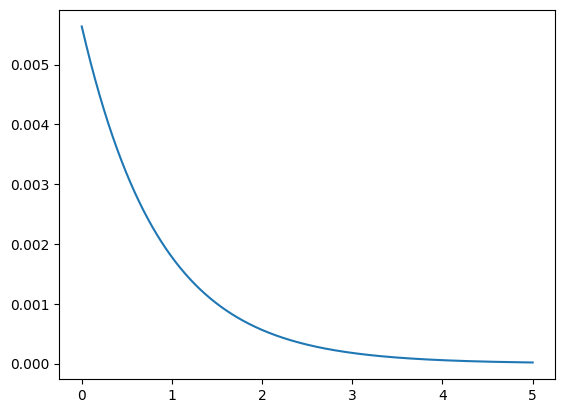

In [20]:
from matplotlib import pyplot as plt
x, y = problem.get_marginals()[1].to_discrete()
plt.plot(x, y)


In [23]:
gaussian_generator = GaussianMixtureGenerator(
    name="Gaussian-1d-1024p",
    dim=1,
    num_components=1,
    n_points=512,
    num_datasets=2,
    borders=[-1, 1],
    cost_fn=cost_euclid_squared
)

In [146]:
problem = list(gaussian_generator.generate())[0]

reg = 1e-2
c = problem.get_costs()[0] / problem.get_costs()[0].std()

result = PDLPSolver().solve(
    marginals=problem.get_marginals(),
    costs=problem.get_costs(),
    reg=1e-3,
    tol=1e-8,
    maxiter=300000
)

In [147]:
u, v = result["u_final"], result["v_final"]
plan = result["transport_plan"]

In [148]:
result

{'transport_plan': Array([[5.45926394e-08, 5.80969434e-08, 6.18155179e-08, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.65729383e-04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.63458511e-04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.61213724e-04]], dtype=float64),
 'cost': Array(0.63577628, dtype=float64),
 'u_final': Array([ 1.30254929e+00,  1.29769616e+00,  1.29232231e+00,  1.28664188e+00,
         1.28071676e+00,  1.27460804e+00,  1.26837587e+00,  1.26202103e+00,
         1.25554445e+00,  

In [149]:
import jax.numpy as jnp

mu = problem.get_marginals()[0].to_discrete()[1]
nu = problem.get_marginals()[1].to_discrete()[1]

P = jnp.clip(1/reg*(u[:, None] + v[None, :] - problem.get_costs()[0]), 0.0)

(<Axes: >, <Axes: >, <Axes: >)

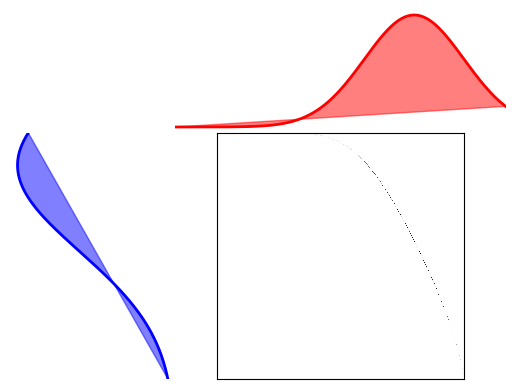

In [150]:
import ot.plot

ot.plot.plot1D_mat(mu, nu, P)

(<Axes: >, <Axes: >, <Axes: >)

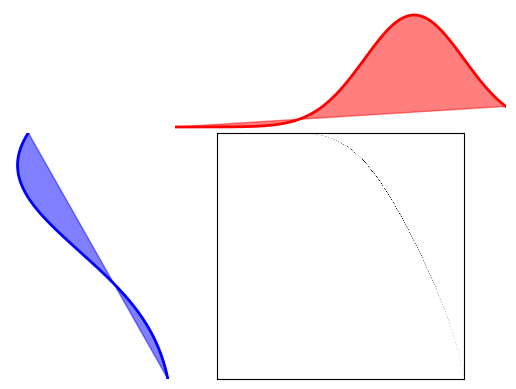

In [151]:
ot.plot.plot1D_mat(mu, nu, plan)

In [152]:
jnp.linalg.norm(P - plan)

Array(0.03915007, dtype=float64)

In [153]:
P_lp = ot.emd(mu, nu, problem.get_costs()[0])

In [154]:
jnp.linalg.norm(P - P_lp)

Array(0.03914951, dtype=float64)